# Inference with Probabilistic Graphical Models

###### COMP4670/8600 - Introduction to Statistical Machine Learning - Assignment 2 (due: Monday, 18 May, 23:59)

Name: Zhuang Li

Student ID: u5391572

## Instructions

|             |Notes|
|:------------|:--|
|Maximum marks| 20|
|Weight|20% of final grade|
|Format| Complete this ipython notebook. Do not forget to fill in your name and student ID above|
|Submission mode| Use [wattle](https://wattle.anu.edu.au/)|
|Formulas| All formulas which you derive need to be explained unless you use very common mathematical facts. Picture yourself as explaining your arguments to somebody who is just learning about your assignment. With other words, do not assume that the person marking your assignment knows all the background and therefore you can just write down the formulas without any explanation. It is your task to convince the reader that you know what you are doing when you derive an argument.|
| Code quality | Python code should be well structured, use meaningful identifiers for variables and subroutines, and provide sufficient comments. Please refer to the examples given in the tutorials. |
| Code efficiency | An efficient implementation of an algorithm uses fast subroutines provided by the language or additional libraries. For the purpose of implementing Machine Learning algorithms in this course, that means using the appropriate data structures provided by Python and in numpy/scipy (e.g. Linear Algebra and random generators). |
| Late penalty | For every day (starts at midnight) after the deadline of an assignment, the mark will be reduced by 5%. No assignments shall be accepted if it is later than 10 days. | 
| Coorperation | All assignments must be done individually. Cheating and plagiarism will be dealt with in accordance with University procedures (please see the ANU policies on [Academic Honesty and Plagiarism](http://academichonesty.anu.edu.au)). Hence, for example, code for programming assignments must not be developed in groups, nor should code be shared. You are encouraged to broadly discuss ideas, approaches and techniques with a few other students, but not at a level of detail where specific solutions or implementation issues are described by anyone. If you choose to consult with other students, you will include the names of your discussion partners for each solution. If you have any questions on this, please ask the lecturer before you act. |
| Solution | To be presented in the tutorials. |

$\newcommand{\dotprod}[2]{\left\langle #1, #2 \right\rangle}$
$\newcommand{\onevec}{\mathbb{1}}$

Setting up the environment

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import itemfreq
import time
from scipy import stats
from collections import Counter
%install_ext https://sml.forge.nicta.com.au/isml15/data/tikzmagic.py

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


In [3]:
%load_ext tikzmagic
%matplotlib inline

##Important!!!!
##My python version is 3.4.2,pandas is 0.16.0,scipy is 0.15.1 and ipython notebook is version 4. Please use this version to run my program!!

## Part 1: (4 points) Marginal and conditional probability

At the end of Semester 1 of 2015, the results of a course at a university were released.
The following table contains the numbers of students who passed and failed the course.

|  | Passed | Failed |
|--|:--:|:--:|
| Women | 27 | 8 |
| Men | 29 | 6 |

### Part 1a: Men vs Women

Compute the following probabilities (show details of your reasoning):
* probability that a person passes the course
* probability that a woman passes the course
* probability that a man passes the course

### Solution description
probability that a person passes the course
$$
P(Passed)=\sum_{Gender=Women,Men}P(Gender,Passed)=\frac{27+29}{27+29+8+6}=0.8000
$$

probability that a woman passes the course

$$
P(Passed|Women)=\frac{P(Passed,Women)}{P(Women)}=2\cdot{\frac{27}{70}}=0.7714
$$

probability that a man passes the course

$$
P(Passed|Men)=\frac{P(Passed,Men)}{P(Men)}=2\cdot{\frac{29}{70}}=0.8286
$$

### Part 1b: Including Bachelor and Master's level

The dean is concerned that the lecturer may be failing a higher proportion of women than men in the course, so she investigates further and demands the numbers of students at the Bachelor and Master's level.

|  | Passed | Failed |
|--|:--:|:--:|
| B.Sc Women | 8 | 1 |
| B.Sc Men | 23 | 3 |
| M.Sc Women | 19 | 7 |
| M.Sc Men | 6 | 3 |

Compute the following probabilities (show details of your reasoning):
* probability that a B.Sc student passes the course
* probability that a B.Sc woman passes the course
* probability that a B.Sc man passes the course
* probability that a M.Sc student passes the course
* probability that a M.Sc woman passes the course
* probability that a M.Sc man passes the course

### Solution description
probability that a B.Sc student passes the course
$$
P(Passed|B.Sc)=\frac{P(Passed,B.Sc)}{P(B.Sc)}
=\frac{31}{31+4}=0.8857
$$
probability that a B.Sc woman passes the course
$$
P(Passed|B.Sc,Gender=Women)=\frac{P(Passed,B.Sc,Gender=Women)}{P(B.Sc,Gender=Women)}
=\frac{8}{8+1}=0.8889
$$
probability that a B.Sc man passes the course
$$
P(Passed|B.Sc,Gender=Men)=\frac{P(Passed,B.Sc,Gender=Men)}{P(B.Sc,Gender=Men)}
=\frac{23}{23+3}=0.8846
$$
probability that a M.Sc student passes the course
$$
P(Passed|M.Sc)=\frac{P(Passed,M.Sc)}{P(M.Sc)}
=\frac{25}{25+10}=0.7143
$$
probability that a M.Sc woman passes the course
$$
P(Passed|M.Sc,Gender=Women)=\frac{P(Passed,M.Sc,Gender=Women)}{P(M.Sc,Gender=Women)}
=\frac{19}{19+7}=0.7308
$$
probability that a M.Sc man passes the course
$$
P(Passed|M.Sc,Gender=Men)=\frac{P(Passed,M.Sc,Gender=Men)}{P(M.Sc,Gender=Men)}
=\frac{6}{6+3}=0.6667
$$

### Part 1c: Interpreting results

Given the probabilities of passing that you have computed in the two parts above, discuss whether women are more likely to pass the course compared to men.
Explain how you came to your conclusion using the data that is presented above.

### Solution description
$$
P(Passed|Gender=Women)=\frac{P(Passed,Gender=Women)}{P(Gender=Women)}=\frac{8+19}{8+1+19+7}=0.7714
$$
$$
P(Passed|Gender=Men)=\frac{P(Passed,Gender=Men)}{P(Gender=Men)}=\frac{23+6}{23+3+6+3}=0.8286
$$

As we can see from the calculation of the probability,in whole, women (with probability **0.7714**) do easily fail compared with men (with probability **0.8286**) while both with master degree and bachelor, women are more easily to pass(**0.7308** to **0.6667** and **0.8889** to **0.8846** respectively). The paradox is the famous "Simpson's paradox".
####Reference
http://en.wikipedia.org/wiki/Simpson%27s_paradox

### Part 1d: Computing conditional probability tables

Compute the following conditional probability tables:
* The probability of the level of the student (B.Sc or M.Sc) conditioned on the gender
* The probability of the level of the student conditioned on whether the student passed

### Solution description
The probability of the level of the student (B.Sc or M.Sc) conditioned on the gender:

$$
P(B.Sc|Gender=Men)=\frac{P(B.Sc,Gender=Men)}{P(Gender=Men)}=\frac{23+3}{23+3+6+3}=0.7429
$$
$$
P(B.Sc|Gender=Women)=\frac{P(B.Sc,Gender=Women)}{P(Gender=Women)}=\frac{8+1}{8+1+19+7}=0.2571
$$
$$
P(M.Sc|Gender=Men)=\frac{P(M.Sc,Gender=Men)}{P(Gender=Men)}=\frac{6+3}{23+3+6+3}=0.2571
$$
$$
P(M.Sc|Gender=Women)=\frac{P(M.Sc,Gender=Women)}{P(Gender=Women)}=\frac{19+7}{8+1+19+7}=0.7429
$$
Probability table:

|             | Gender=Men | Gender=Women |
|-------------|------------|--------------|
| Degree=B.Sc | 0.7429     | 0.2571       | 
| Degree=M.Sc | 0.2571     | 0.7429       | 


The probability of the level of the student conditioned on whether the student passed:
$$
P(B.Sc|Passed=Yes)=\frac{P(B.Sc,Passed=Yes)}{P(Passed=Yes)}=\frac{8+23}{8+23+19+6}=0.5536
$$
$$
P(B.Sc|Passed=No)=\frac{P(B.Sc,Passed=No)}{P(Passed=No)}=\frac{1+3}{1+3+7+3}=0.2857
$$
$$
P(M.Sc|Passed=Yes)=\frac{P(M.Sc,Passed=Yes)}{P(Passed=Yes)}=\frac{19+6}{8+23+19+6}=0.4464
$$
$$
P(M.Sc|Passed=No)=\frac{P(M.Sc,Passed=No)}{P(Passed=No)}=\frac{7+3}{1+3+7+3}=0.7143
$$
Probability table:

|             | Passed=Yes | Passed=No |
|-------------|------------|-----------|
| Degree=B.Sc | 0.5536     | 0.2571    | 
| Degree=M.Sc | 0.4464     | 0.7143    | 

## Bayesian Network

If you get Bronchitis, it is likely to cause Aches. Additionally it may be a severe Disease, especially if you have a Cough. Of course, not all Coughs result in a Disease, and some of them may be Fast healing. If your Disease is serious, it is likely to be an Emergency and you should head to hospital.

Consider the following Bayesian Network that formalises the above scenario. It has the following variables:
* **A**ches with states (False, True)
* **B**ronchitis with states (none, mild, severe)
* **C**ough with states (False, True)
* **D**isease with states (healthy, carrier, sick, recovering)
* **E**mergency with states (False, True)
* **F**ast healing with states (False, True)

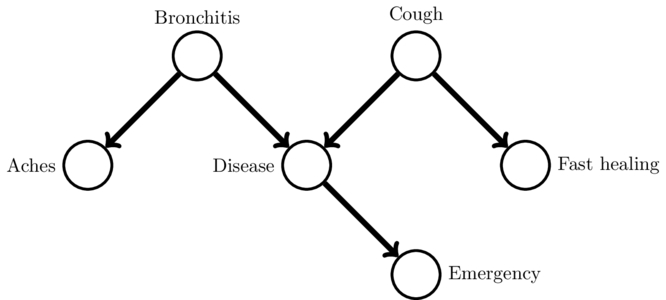

In [3]:
%%tikz --scale 2 --size 700,300 -f jpg
\tikzstyle{vertex}=[circle, draw=black, fill=white, line width=0.5mm, minimum size=25pt, inner sep=0pt]
\tikzstyle{edge} = [draw, line width=1mm, ->]

\node[vertex,label=left:{Aches}] (a) at (0,0) {};
\node[vertex,label=above:{Bronchitis}] (b) at (1,1) {};
\node[vertex,label=above:{Cough}] (c) at (3,1) {};
\node[vertex,label=left:{Disease}] (d) at (2,0) {};
\node[vertex,label=right:{Emergency}] (e) at (3,-1) {};
\node[vertex,label=right:{Fast healing}] (f) at (4,0) {};

\foreach \source/ \dest in {b/a, b/d, c/d, d/e, c/f}
        \path[edge] (\source) -- (\dest);

The conditional probabilities are given by the following tables.

|$p(B)$ | B=n | B=m | B=s |
|:-----:|:--:|:--:|:--:|
|marginal| 0.97 | 0.01 | 0.02 |

|$p(C)$ | C=False | C=True |
|:-----:|:--:|:--:|
|marginal| 0.7 | 0.3 |

| $p(A|B)$ | B=n | B=m | B=s |
|:-----:|:--:|:--:|:--:|
|**A**=False |0.9|0.8|0.3|
|**A**=True |0.1|0.2|0.7|

| $p(D|B,C)$ | B=n, C=F | B=m, C=F | B=s, C=F | B=n, C=T | B=m, C=T | B=s, C=T |
|:-----:|:--:|:--:|:--:|:--:|:--:|:--:|
|**D**=healthy   |0.9 |0.8 |0.1 |  0.3 |0.4 |0.01|
|**D**=carrier   |0.08|0.17|0.01|  0.05|0.05|0.01|
|**D**=sick      |0.01|0.01|0.87|  0.05|0.15|0.97|
|**D**=recovering|0.01|0.02|0.02|  0.6 |0.4 |0.01|

| $p(E|D)$ | D=h | D=c | D=s | D=r |
|:-----:|:--:|:--:|:--:|
|**E**=False |0.99|0.99|0.4|0.9|
|**E**=True |0.01|0.01|0.6|0.1|

| $p(F|C)$ | C=False | C=True |
|:-----:|:--:|:--:|
|**F**=False |0.99|0.2|
|**F**=True |0.01|0.8|

## Part 2: (6 points) Markov Chain Monte Carlo

We consider a special case of the Metropolis Hastings algorithm. 
Recall that the Metropolis Hastings algorithm uses the current sample to decide which next sample to produce.
We use the proposal distribution which is the conditional distribution of a single variable, conditioned on the current state of all the other variables. We cycle through all the variables at each time step, updating the current state. That is for each step, we sample:
* p(A | B,C,D,E,F)
* p(B | A,C,D,E,F)
* p(C | A,B,D,E,F)
* p(D | A,B,C,E,F)
* p(E | A,B,C,D,F)
* p(F | A,B,C,D,E)

After each sampling step, we use the sample as the new state of the variable.

### Part 2a: Implement MCMC algorithm

Implement this Markov chain Monte Carlo algorithm for the above graphical model. Use
$$
p(A=False, B=none, C=False, D=healthy, E=False, F=False)
$$
as the initial state.

*Hint: You may find ```numpy.random.multinomial``` useful.*

*Hint: Many of the proposal distributions can be simplified due to the structure of the graphical model.*

###Solution Description
As we can see from the proposal distribution, they can be simplified.
* p(A | B,C,D,E,F)
\begin{align*}
p(A | B,C,D,E,F)&=\frac{p(A,B,C,D,E,F)}{p(B,C,D,E,F)}\\
&=\frac{p(A|B)p(B)p(C)p(D|B,C)p(E|D)p(F|C)}{\sum_A{p(A|B)p(B)p(C)p(D|B,C)p(E|D)p(F|C)}}\\
&=p(A|B)
\end{align*}
* p(B | A,C,D,E,F)
\begin{align*}
p(B | A,C,D,E,F)&=\frac{p(A,B,C,D,E,F)}{p(A,C,D,E,F)}\\
&=\frac{p(A|B)p(B)p(C)p(D|B,C)p(E|D)p(F|C)}{\sum_B{p(A|B)p(B)p(C)p(D|B,C)p(E|D)p(F|C)}}\\
&=\frac{p(A|B)p(B)p(D|B,C)}{\sum_B{p(A|B)p(B)p(D|B,C)}}
\end{align*}
Since $\sum_B{p(A|B)p(B)p(D|B,C)}$ is a constant.So:
$$
p(B | A,C,D,E,F)\propto p(A|B)p(B)p(D|B,C)
$$
* p(C | A,B,D,E,F)
\begin{align*}
p(C | A,B,D,E,F)&=\frac{p(A,B,C,D,E,F)}{p(A,B,D,E,F)}\\
&=\frac{p(A|B)p(B)p(C)p(D|B,C)p(E|D)p(F|C)}{\sum_C{p(A|B)p(B)p(C)p(D|B,C)p(E|D)p(F|C)}}\\
&=\frac{p(C)p(D|B,C)p(F|C)}{\sum_C{p(C)p(D|B,C)p(F|C)}}
\end{align*}
Since $\sum_C{p(C)p(D|B,C)p(F|C)}$ is a constant.So:
$$
p(C | A,B,D,E,F)\propto p(C)p(D|B,C)p(F|C)
$$
* p(D | A,B,C,E,F)
\begin{align*}
p(D | A,B,C,E,F)&=\frac{p(A,B,C,D,E,F)}{p(A,B,C,E,F)}\\
&=\frac{p(A|B)p(B)p(C)p(D|B,C)p(E|D)p(F|C)}{\sum_D{p(A|B)p(B)p(C)p(D|B,C)p(E|D)p(F|C)}}\\
&=\frac{p(D|B,C)p(E|D)}{\sum_D{p(D|B,C)p(E|D)}}
\end{align*}
Since $\sum_D{p(D|B,C)p(E|D)}$ is a constant.So:
$$
p(D | A,B,C,E,F)\propto p(D|B,C)p(E|D)
$$
* p(E | A,B,C,D,F)
\begin{align*}
p(E | A,B,C,D,F)&=\frac{p(A,B,C,D,E,F)}{p(A,B,C,D,F)}\\
&=\frac{p(A|B)p(B)p(C)p(D|B,C)p(E|D)p(F|C)}{\sum_E{p(A|B)p(B)p(C)p(D|B,C)p(E|D)p(F|C)}}\\
&=p(E|D)
\end{align*}
* p(F | A,B,C,D,E)
\begin{align*}
p(F | A,B,C,D,E)&=\frac{p(A,B,C,D,E,F)}{p(A,B,C,D,E)}\\
&=\frac{p(A|B)p(B)p(C)p(D|B,C)p(E|D)p(F|C)}{\sum_F{p(A|B)p(B)p(C)p(D|B,C)p(E|D)p(F|C)}}\\
&=p(F|C)
\end{align*}

In [55]:
def iniProbabilityTable():
    """
    construct the probability distribution according to the distribution tables
    
    """
    #probabilty of B
    pB_array=np.array([[0.97],[0.01],[0.02]])
    #probabilty of C
    pC_array=np.array([[0.7],[0.3]])
    #probabilty of A given C
    pA_B_array=np.array([[0.9,0.8,0.3],[0.1,0.2,0.7]])
    #probabilty of D given BC
    pD_BC_array=np.array([[0.9,0.8,0.1,0.3,0.4,0.01],[0.08,0.17,0.01,0.05,0.05,0.01],[0.01,0.01,0.87,0.05,0.15,0.97],[0.01,0.02,0.02,0.6,0.4,0.01]])
    #probabilty of E given D
    pE_D_array=np.array([[0.99,0.99,0.4,0.9],[0.01,0.01,0.6,0.1]])
    #probabilty of F given C
    pF_C_array=np.array([[0.99,0.2],[0.01,0.8]])
    label_A=['A=F','A=T']
    label_B=['B=n','B=m','B=s']
    label_C=['C=F','C=T']
    label_D=['D=h','D=c','D=s','D=r']
    label_E=['E=F','E=T']
    label_F=['F=F','F=T']
    label_BC = list(zip(*[np.array(['B=n','B=m','B=s','B=n','B=m','B=s']),np.array(['C=F', 'C=F', 'C=F', 'C=T', 'C=T', 'C=T'])]))
    pB = pd.DataFrame(pB_array,index=pd.Index(label_B,name='B'))
    pC=pd.DataFrame(pC_array,index=pd.Index(label_C,name='C'))
    pA_B=pd.DataFrame(pA_B_array,index=pd.Index(label_A,name='A'),columns=pd.Index(label_B,name='B'))
    pD_BC=pd.DataFrame(pD_BC_array,index=pd.Index(label_D,name='D'),columns=pd.MultiIndex.from_tuples(label_BC,names=['B','C']))
    pE_D=pd.DataFrame(pE_D_array,index=pd.Index(label_E,name='E'),columns=pd.Index(label_D,name='D'))
    pF_C=pd.DataFrame(pF_C_array,index=pd.Index(label_F,name='F'),columns=pd.Index(label_C,name='C'))
    return pB,pC,pA_B,pD_BC,pE_D,pF_C,label_A,label_B,label_C,label_D,label_E,label_F
def gibbsSample(pB,pC,pA_B,pD_BC,pE_D,pF_C,label_A,label_B,label_C,label_D,label_E,label_F,T):
    """
    
    """
    #initial state
    sample=['A=F','B=s','C=F','D=h','E=F','F=F']
    sampleState=[]
    for i in range(T):
        #draw sample A from p(A | B,C,D,E,F)
        sample_A=sampleA(sample,pA_B)
        sample[0]=sample_A
        #draw sample B from p(B | A,C,D,E,F)
        #sample_B=sampleB(sample,pB,pA_B,pD_BC)
        sample[1]='B=s'
        #draw sample C from p(C | A,B,D,E,F)
        sample_C=sampleC(sample,pC,pD_BC,pF_C)
        sample[2]=sample_C
        #draw sample D from p(D | A,B,C,E,F)
        sample_D=sampleD(sample,pD_BC,pE_D)
        sample[3]=sample_D
        #draw sample E from p(E | A,B,C,D,F)
        sample_E=sampleE(sample,pE_D)
        sample[4]=sample_E
        #draw sample F from p(F | A,B,C,D,E)
        sample_F=sampleF(sample,pF_C)
        sample[5]=sample_F
        sampleState.append(list(sample))
    return sampleState
        
def sampleA(sample,pA_B):
    """
    sample A function
    """
    margin_A=pA_B[sample[1]]
    index=np.random.multinomial(1,margin_A).argmax()
    return label_A[index]
def sampleB(sample,pB,pA_B,pD_BC):
    """
    sample B function
    """
    unnorm_margin_B=pD_BC.loc[sample[3]].loc[:,sample[2]].values*pB.values.T*pA_B.loc[sample[0]].values
    margin_B=unnorm_margin_B/np.sum(unnorm_margin_B)
    index=np.random.multinomial(1,margin_B[0]).argmax()
    return label_B[index]
def sampleC(sample,pC,pD_BC,pF_C):
    """
    sample C function
    """
    unnorm_margin_C=pD_BC.loc[sample[3]].loc[sample[1]].values*pC.values.T*pF_C.loc[sample[5]].values
    margin_C=unnorm_margin_C/np.sum(unnorm_margin_C)
    index=np.random.multinomial(1,margin_C[0]).argmax()
    return label_C[index]
def sampleD(sample,pD_BC,pE_D):
    """
    sample D function
    """
    unnorm_margin_D=pD_BC.loc[:,(sample[1],sample[2])].values*pE_D.loc[sample[4]].values
    margin_D=unnorm_margin_D/np.sum(unnorm_margin_D)
    index=np.random.multinomial(1,margin_D).argmax()
    return label_D[index]
def sampleE(sample,pE_D):
    """
    sample E function
    """
    margin_E=pE_D[sample[3]]
    index=np.random.multinomial(1,margin_E).argmax()
    return label_E[index]
def sampleF(sample,pF_C):
    """
    sample F function
    """
    margin_F=pF_C[sample[2]]
    index=np.random.multinomial(1,margin_F).argmax()
    return label_F[index]
def toDataFrame(sampleState):
    """
    add headers on the sampled data
    """
    headers=['A','B','C','D','E','F']
    return pd.DataFrame(sampleState,columns=headers)
current_time=time.clock()
T=5000 #iteration times default is 4000
#np.random.seed(1)#default seed is 1
#initial probability table
pB,pC,pA_B,pD_BC,pE_D,pF_C,label_A,label_B,label_C,label_D,label_E,label_F=iniProbabilityTable()
# do the gibbs sampling
sampleState=gibbsSample(pB,pC,pA_B,pD_BC,pE_D,pF_C,label_A,label_B,label_C,label_D,label_E,label_F,T)
newSample=[]
for i in range(500,5000,5):
    newSample.append(sampleState[i])
sampleData=toDataFrame(newSample)
print (sampleData)   #print sampled data points
print ('Time Cost: '+str(time.clock()-current_time)+'s')   #print the time cost

       A    B    C    D    E    F
0    A=T  B=s  C=F  D=s  E=T  F=F
1    A=T  B=s  C=F  D=s  E=F  F=F
2    A=T  B=s  C=F  D=s  E=T  F=F
3    A=F  B=s  C=F  D=s  E=F  F=F
4    A=T  B=s  C=F  D=s  E=F  F=F
5    A=T  B=s  C=F  D=s  E=T  F=F
6    A=T  B=s  C=F  D=s  E=T  F=F
7    A=T  B=s  C=F  D=c  E=F  F=F
8    A=F  B=s  C=F  D=h  E=F  F=F
9    A=T  B=s  C=F  D=s  E=T  F=F
10   A=T  B=s  C=F  D=s  E=T  F=F
11   A=T  B=s  C=F  D=s  E=T  F=F
12   A=T  B=s  C=F  D=s  E=F  F=F
13   A=F  B=s  C=T  D=s  E=F  F=T
14   A=F  B=s  C=T  D=s  E=T  F=F
15   A=F  B=s  C=F  D=s  E=T  F=F
16   A=T  B=s  C=T  D=s  E=F  F=T
17   A=T  B=s  C=F  D=s  E=T  F=F
18   A=F  B=s  C=T  D=s  E=F  F=T
19   A=T  B=s  C=T  D=s  E=T  F=T
20   A=F  B=s  C=F  D=s  E=F  F=F
21   A=T  B=s  C=T  D=r  E=F  F=T
22   A=T  B=s  C=T  D=s  E=T  F=T
23   A=T  B=s  C=F  D=s  E=T  F=F
24   A=T  B=s  C=F  D=s  E=T  F=F
25   A=T  B=s  C=F  D=s  E=T  F=F
26   A=F  B=s  C=F  D=s  E=F  F=F
27   A=T  B=s  C=F  D=s  E=T  F=F
28   A=T  B=s 

### Part 2b: Proposed algorithm is a valid MCMC method

In the lectures, you have seen that Metropolis Hastings algorithms need to satisfy certain properties. State these properties and show that the proposed algorithm satisfies them.

### Solution description
Firstly, MCMC must satisfy *ergodicity*, which means when number of samples $m->\infty$, the distribution $p(\mathbf{z}^{(m)})$ will converge to one desired *invariant* distribution $p^*(\mathbf{z})$. Here we define $\mathbf{z}=(A,B,C,D,E,F)$.

####Proof for invariant
To achieve the property **invariant**, we should construct a transition probability to satisfy the property of *detailed banlance*, which is the sufficient but not necessary condition to ensure *invariant*.
$$
p^*(\mathbf{z})T(\mathbf{z},\mathbf{z}')=p^*(\mathbf{z}')T(\mathbf{z}',\mathbf{z})
$$
where:
$
T(\mathbf{z}',\mathbf{z})
$ is the transition probability.
Because we draw samples from:
* p(A | B,C,D,E,F)
* p(B | A,C,D,E,F)
* p(C | A,B,D,E,F)
* p(D | A,B,C,E,F)
* p(E | A,B,C,D,F)
* p(F | A,B,C,D,E)

So the transition probability from $\mathbf{z}$ to $\mathbf{z}'$ (here we use the note $q_k(\mathbf{z}'|\mathbf{z})$) can be regarded as $p(z'_k|\mathbf{z}_{\backslash k})$. 

Then let's calculate the accept probability:
\begin{align*}
A(\mathbf{z}',\mathbf{z})&=min(1,\frac{p(\mathbf{z}')q_k(\mathbf{z}|\mathbf{z}')}{p(\mathbf{z})q_k(\mathbf{z}'|\mathbf{z})})\\
&=min(1,\frac{p(z_k'|\mathbf{z}_{\backslash k}')p(\mathbf{z}_{\backslash k}')p(z_k|\mathbf{z}_{\backslash k}')}{p(z_k|\mathbf{z}_{\backslash k})p(\mathbf{z}_{\backslash k})p(z_k'|\mathbf{z}_{\backslash k})})\\
\end{align*}

Because $$p(z_k'|\mathbf{z}_{\backslash k}')p(\mathbf{z}_{\backslash k}')p(z_k|\mathbf{z}_{\backslash k}')=p(z_k|\mathbf{z}_{\backslash k})p(\mathbf{z}_{\backslash k})p(z_k'|\mathbf{z}_{\backslash k})$$ where we used the fact that $\mathbf{z}_{\backslash k}$ is fixed so $\mathbf{z}_{\backslash k}'=\mathbf{z}_{\backslash k}$ because the components are unchanged by the sampling steps. Here we can see the detailed banlance was already constructed.

And in this particular case accept rate:
$$
A(\mathbf{z}',\mathbf{z})=1
$$
####Proof for ergodic
To achieve the **ergodic**, one simple way to ensure ergodicity of T is to have $T(\mathbf{z}',\mathbf{z}) > 0$ for all $\mathbf{z}'$,$\mathbf{z}$. Because only in this situation, any points in $\mathbf{z}$ space can be reached from any other point in a finite number. It is obvious that all dimensions are updated with positive probability. So this sample procedure is *ergodic*.
###Reference
Christopher M. Bishop *“Pattern Recognition and Machine Learning”* chapter 11
http://www.cc.gatech.edu/~lebanon/notes/metropolis.pdf

### Part 2c: Estimating probabilities

Use the sampler you implemented above to get estimates of the probabilities below.
Choose appropriate values for burn in and the number of samples to use for the empirical probabilities.
Plot the empirical probabilities that you obtain for the following:
* p(E)
* p(E|B=s)
* p(E|B=s, C=T)

###Reason to choose mixing point

We assume the point at half of the sampling is the mixing point which means after this point
the distribution is invariant

The reason why we chose this point is because as calculated after multiplying the distribution tables ,there are 192 entries. 

So if we iterate 2000 times, on average each entries will be sampled 10 times(just on average). Now since I sampled 4000 times, at half of the data points (2000 times) could be a good heuristic evaluation.

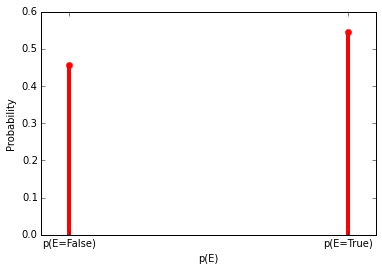

Probability p(E=True)=0.544444444444
Probability p(E=False)=0.455555555556


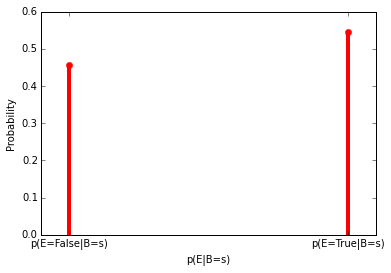

Probability p(E=True|B=s)=0.544444444444
Probability p(E=False|B=s)=0.455555555556


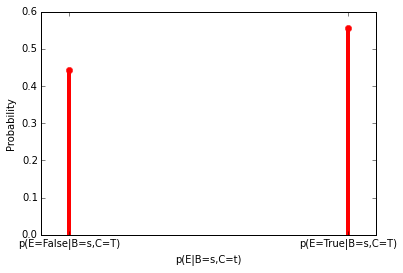

Probability p(E=True|B=s,C=T)=0.556818181818
Probability p(E=False|B=s,C=T)=0.443181818182


In [56]:

def plot_pE(sampleData):
    """
    plot P(E)
    """
    try:
        norm=sampleData['E'].shape[0]
        p_E_count = Counter(sampleData['E'].values)
        p_E = np.array((p_E_count['E=F'],p_E_count['E=T']))/float(norm)
        xk = np.arange(2)
        pk = p_E
        custm = stats.rv_discrete(name='custm', values=(xk, pk))
        plt.plot(xk, custm.pmf(xk), 'ro', mec='r')
        plt.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
        plt.xticks(xk,['p(E=False)','p(E=True)'])
        plt.xlabel('p(E)')
        plt.ylabel('Probability')
        plt.xlim(-0.1,1.1)
        plt.show()
        print ('Probability p(E=True)='+str(p_E[1]))
        print ('Probability p(E=False)='+str(p_E[0]))
    except Exception:
        print ("Sorry, error exists!")
        print ("95%:sampling didn't get samples of (E)! Please get more samples and try again.")
        print ("4%:pandas and scipy version is not compatible! Please update your pandas and scipy to the latest version(0.16.0,0.15.1)!")
        print ("1%:unknown bugs")
def plot_pE_Bs(sampleData):
    """
    plot P(E|B=s)
    """
    try:
        condition_Data=sampleData[(sampleData.B=='B=s')]
        norm=condition_Data.shape[0]
        pE_Bs_count = Counter(condition_Data['E'].values)
        pE_Bs = np.array((pE_Bs_count['E=F'],pE_Bs_count['E=T']))/float(norm)
        xk = np.arange(2)
        pk = pE_Bs
        custm = stats.rv_discrete(name='custm', values=(xk, pk))
        plt.plot(xk, custm.pmf(xk), 'ro', mec='r')
        plt.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
        plt.xlabel('p(E|B=s)')
        plt.ylabel('Probability')
        plt.xlim(-0.1,1.1)
        plt.xticks(xk,['p(E=False|B=s)','p(E=True|B=s)'])
        plt.show()
        print ('Probability p(E=True|B=s)='+str(pE_Bs[1]))
        print ('Probability p(E=False|B=s)='+str(pE_Bs[0]))
    except Exception:
        print ("Sorry, error exists!")
        print ("95%:sampling didn't get samples of (E|B=s)! Please get more samples and try again.")
        print ("4%:pandas and scipy version is not compatible! Please update your pandas and scipy to the latest version(0.16.0,0.15.1)!")
        print ("1%:unknown bugs")
def plot_pE_Bs_Ct(sampleData):
    """
    plot P(E|B=s,C=t)
    """
    try:
        condition_Data=sampleData[(sampleData.B=='B=s')&(sampleData.C=='C=T')]
        norm=condition_Data.shape[0]
        pE_Bs_Ct_count = Counter(condition_Data['E'].values)
        pE_Bs_Ct = np.array((pE_Bs_Ct_count['E=F'],pE_Bs_Ct_count['E=T']))/float(norm)
        xk = np.arange(2)
        pk = pE_Bs_Ct
        custm = stats.rv_discrete(name='custm', values=(xk, pk))
        plt.plot(xk, custm.pmf(xk), 'ro', mec='r')
        plt.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
        plt.xlabel('p(E|B=s,C=t)')
        plt.ylabel('Probability')
        plt.xlim(-0.1,1.1)
        plt.xticks(xk,['p(E=False|B=s,C=T)','p(E=True|B=s,C=T)'])
        plt.show()
        print ('Probability p(E=True|B=s,C=T)='+str(pE_Bs_Ct[1]))
        print ('Probability p(E=False|B=s,C=T)='+str(pE_Bs_Ct[0]))
    except Exception:
        print ("Sorry, error exists!")
        print ("95%:sampling didn't get samples of (E|B=s,C=T)! Please get more samples and try again.")
        print ("4%:pandas and scipy version is not compatible! Please update your pandas and scipy to the latest version(0.16.0,0.15.1)!")
        print ("1%:unknown bugs")
#choose half of the data points as the invariant point
sampleNumber=sampleData.shape[0]
mixingData=sampleData.iloc[int(sampleNumber/2):sampleNumber]
plot_pE(sampleData)
plot_pE_Bs(sampleData)
plot_pE_Bs_Ct(sampleData)

## Part 3: (7 points) Message Passing

In this section, we use the same distribution as above.

### Part 3a: Factor graph

Draw the factor graph (in tikz) corresponding to the Bayesian Network above which that consists of the factors:

* f(A,B)
* f(B,C,D)
* f(C)
* f(D,E)
* f(C,F)

Write down the factors in terms of the conditional probability tables above.

*The tikz code needs to be in a cell by itself.*

According to the Bayesian Network, the joint probability:
\begin{align*}
P(A,B,C,D,E)&=P(B)P(C)P(A|B)P(D|B,C)P(F|C)P(E|D)\\
&=f(A,B)f(B,C,D)f(C)f(D,E)f(C,F)
\end{align*}
So,
\begin{align*}
f(A,B)&=P(A|B)P(B)\\
f(B,C,D)&=P(D|B,C)\\
f(C)&=P(C)\\
f(D,E)&=P(E|D)\\
f(C,F)&=P(F|C)\\
\end{align*}


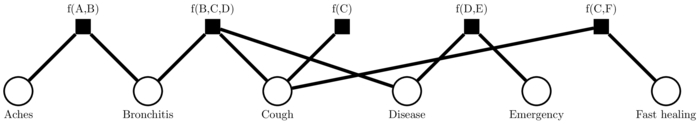

In [6]:
%%tikz --scale 2 --size 700,300 -f jpg
\tikzstyle{vertex}=[circle, draw=black, fill=white, line width=0.5mm, minimum size=25pt, inner sep=0pt]
\tikzstyle{edge} = [draw, line width=1mm, -]

\node[vertex,label=below:{Aches}] (a) at (0,0) {};
\node[vertex,label=below:{Bronchitis}] (b) at (2,0) {};
\node[vertex,label=below:{Cough}] (c) at (4,0) {};
\node[vertex,label=below:{Disease}] (d) at (6,0) {};
\node[vertex,label=below:{Emergency}] (e) at (8,0) {};
\node[vertex,label=below:{Fast healing}] (f) at (10,0) {};
\tikzstyle{vertex}=[rectangle, draw=black, fill=black, line width=0.5mm, minimum size=12pt, inner sep=0pt]
\node[vertex,label=above:{f(A,B)}] (g) at (1,1) {};
\node[vertex,label=above:{f(B,C,D)}] (h) at (3,1) {};
\node[vertex,label=above:{f(C)}] (i) at (5,1) {};
\node[vertex,label=above:{f(D,E)}] (j) at (7,1) {};
\node[vertex,label=above:{f(C,F)}] (k) at (9,1) {};
\foreach \source/ \dest in {a/g, g/b, h/b, h/c, h/d,i/c,j/d,j/e,k/c,k/f}
        \path[edge] (\source) -- (\dest);

### Part 3b: Messages at leaf nodes

Implement the two functions corresponding to when the leaf nodes are variables and factors.

In [7]:
def varAsLeaf():
    """
    variable as leaf
    """
    return 1
def factAsLeaf(fx):
    """
    factor as leaf
    """
    return fx

### Part 3c: Messages at internal nodes

Implement the two functions that compute the messages:
* going from variable node to factor node
* going from factor node to variable node

The functions should be flexible enough to work with all the factors and variables with the same interface.

In [8]:
"""
initial the factors
for calculation convenience,we reshape the distribution table as one 
dimension vectors with multiindex
"""
fAB=pA_B.multiply(pB.T.squeeze().values,axis='columns').stack()
fBCD=pD_BC.stack().stack()
fC=pC.squeeze()
fDE=pE_D.stack()
fCF=pF_C.stack()
"""
map the factors with the labels
"""
pDict={}
pDict['fAB']=fAB
pDict['fBCD']=fBCD
pDict['fC']=fC
pDict['fDE']=fDE
pDict['fCF']=fCF
def constructGraph():
    """
    construct bipartite graph using a matrix, each factor or variable corresponds to a index
    the elements in matrix:
    1  -- connected
    -1 -- not connected
    index of factors in row:
    ['fAB','fBCD','fC','fDE','fCF']
    index of variables in column:
    ['A','B','C','D','E','F']
    """
    columns=['A','B','C','D','E','F']
    index=['fAB','fBCD','fC','fDE','fCF']
    connection=np.array([[1,1,-1,-1,-1,-1],[-1,1,1,1,-1,-1],[-1,-1,1,-1,-1,-1],[-1,-1,-1,1,1,-1],[-1,-1,1,-1,-1,1]])
    factorGraph=pd.DataFrame(connection,index,columns)
    return factorGraph

def varToFact(var,fact,factorGraph):
    """
    calculate the message passed from variable node to fact node
    var--variable label
    fact--fact label
    factorGraph--graph construction
    """
    if factorGraph[factorGraph[var]==1].shape[0]==1:
        #when come to the leaf just return 1
        return varAsLeaf()
    else:
        vToF=1
        for factNode in factorGraph.loc[(factorGraph[var]==1)&(factorGraph[var].index!=fact)].index.tolist():
            #call the function factToVar() to gain the message from fact to variable
            vToF=factToVar(factNode,var,factorGraph,pDict).multiply(vToF,axis='index')
        return vToF
def factToVar(fact,var,factorGraph,pDict):
    """
    calculate the message passed from fact node to variable node
    fact--fact label
    var--variable label
    factorGraph--graph construction
    pDict--distribution map with labels
    """
    if factorGraph.loc[fact][(factorGraph.loc[fact]==1)].shape[0]==1:
        #when come to the leaf just return the f(x)
        return factAsLeaf(pDict[fact])
    else:
        unmargin_fToV=pDict[fact]
        for varNode in factorGraph.loc[fact][(factorGraph.loc[fact]==1)&(factorGraph.loc[fact].index!=var)].index.tolist():
            #call the function varToFact() to gain the message from variable to fact
            msg=varToFact(varNode,fact,factorGraph)
            if type(msg)==int and msg==1:
                unmargin_fToV=unmargin_fToV.mul(msg)
            else:
                unmargin_fToV=unmargin_fToV.mul(msg,level=msg.index.name)
        #marginalization
        fToV=unmargin_fToV.groupby(level=var).sum()
        return fToV

### Part 3d: Estimating a marginal distribution

Using the sum product algorithm that you have implemented, compute $p(E)$ for the graphical model above.

In [9]:
def sumProduct(varOrFact,ifvar,factorGraph):
    """
    implement the sum product, here for convenience we chose variable node E as the root
    varOrFact--variable or factor label
    ifvar--if the varOrFact is variable or factor
    factorGraph--graph construction
    """
    if ifvar==True:
        p=1
        #if root is variable we get message from its children factors
        for factNode in factorGraph.loc[(factorGraph[varOrFact]==1)].index.tolist():
            p=factToVar(factNode,varOrFact,factorGraph,pDict).multiply(p,axis='index')
    else:
        p=pDict[varOrFact]
        #if root is factor we get message from its children variables
        for varNode in factorGraph.loc[varOrFact][(factorGraph.loc[varOrFact]==1)].index.tolist():
            msg=varToFact(varNode,varOrFact,factorGraph)
            if type(msg)==int and msg==1:
                p=p.mul(msg)
            else:
                p=p.mul(msg,level=msg.index.name)
    return p
ifvar=True# set if the root is a variable or a factor
factorGraph=constructGraph()
p=sumProduct('E',ifvar,factorGraph)
print ('Probability corresponding variable or factor:')
print ('P(E=True)='+str(p.loc['E=T']))
print ('P(E=False)='+str(p.loc['E=F']))

Probability corresponding variable or factor:
P(E=True)=0.0499937
P(E=False)=0.9500063


## Part 4: (3 points) Interpreting results

Given that you have a cough (i.e. $C=True$), should you go to the hospital? Justify your decision by comparing the probability of an emergency versus the probability of your cough being fast healing.

In [10]:
def multiplyTable(fAB,fBCD,fC,fDE,fCF):
    """
    construct distribution table for p(A,B,C,D,E,F)
    """
    fABCD = pd.merge(fAB.reset_index(),fBCD.reset_index(),on='B')
    fABCD['value'] = fABCD['0_x'] * fABCD['0_y']
    fABCD.drop(['0_x','0_y'],inplace=True,axis=1)
    fABCD=pd.merge(fABCD,fC.reset_index(),on='C')
    fABCD['value'] = fABCD['value'] * fABCD[0]
    fABCD.drop([0],inplace=True,axis=1)
    fABCDE=pd.merge(fABCD,fDE.reset_index(),on='D')
    fABCDE['value'] = fABCDE['value'] * fABCDE[0]
    fABCDE.drop([0],inplace=True,axis=1)
    fABCDEF=pd.merge(fABCDE,fCF.reset_index(),on='C')
    fABCDEF['value'] = fABCDEF['value'] * fABCDEF[0]
    fABCDEF.drop([0],inplace=True,axis=1)
    return fABCDEF
fABCDEF=multiplyTable(fAB,fBCD,fC,fDE,fCF)
"""
print the probability of p(E|C=True) and p(F|C=True)
"""
pE_C=fABCDEF[(fABCDEF['C']=='C=T')].groupby('E').sum()/fABCDEF[(fABCDEF['C']=='C=T')]['value'].sum()
pF_C=fABCDEF[(fABCDEF['C']=='C=T')].groupby('F').sum()/fABCDEF[(fABCDEF['C']=='C=T')]['value'].sum()
print ('p(E|C=True)='+str(pE_C['value'].loc['E=T']))
print ('p(E|C=False)='+str(pE_C['value'].loc['E=F']))
print ('======================')
print ('p(F|C=True)='+str(pF_C['value'].loc['F=T']))
print ('p(F|C=False)='+str(pF_C['value'].loc['F=F']))

p(E|C=True)=0.103704
p(E|C=False)=0.896296
p(F|C=True)=0.8
p(F|C=False)=0.2


### Solution description
For comparing the results, I just brute-forcely construct a distribution of p(A,B,C,D,E,F) and marginalize the probability. And as calculated if I have a cough and I will have **0.103704** probability of my cough being emergency and **0.8** probability of my cough being fast healing. So I think that fortunately that I don't need to go to hospital.

(optional)
Second way using message passing, and get the same answer.

In [11]:
pDict['fBCD']=fBCD.loc(axis=0)[:,'C=T']
pDict['fCF']=fCF.loc(axis=0)[:,'C=T']
pDict['fC']=pd.Series([1],index=pd.Index(['C=T'],name='C'))
pE=sumProduct('E',ifvar,factorGraph)
print (pE)
print ('===============')
pF=sumProduct('F',ifvar,factorGraph)
print (pF)

E
E=F    0.896296
E=T    0.103704
dtype: float64
F
F=F    0.2
F=T    0.8
dtype: float64
